# Parsing Data Of Valorant CSV Files
**Name: Andrew Angulo**

**Project: Data Systems**

The purpose of this project is to grab data from CSV files that depicts data from the game Valorant. We need to turn the data into a Dictionary of Lists and a Nested List so that we can properly display our data within a tabular data using pandas. In the end our data should be parsed 2 different ways.

---
# Location of Files
1. Data_Files/EDA of Valorant/**val_stats**
2. Data_Files/Valorant eSports/**Players** or /**Teams**
3. Data_Files/Valorant Leaderboard Stats/**val_stats**
4. Data_Files/Valorant Weapon Stats/**valorant-stats**

### Description of the files:
- EDA of Valorant/**val_stats** provides a CSV file of the top players with their average data taken from the game Valorant. It   shows their average headshots, the top 3 weapons they use, their kd_ratio and much more. 
- Valorant eSports/**Players** provides us with the players name, rank and their earnings
- Valorant eSports/**Teams** provides us with the teams, the ratings of these teams and the earnings
- Valorant Leaderboard Stats/**val_stats** provides us the top players and all of the information of their average playstyle     within the game Valorant
- Valorant Weapon Stats/**valorant-stats** provides us with the data each gun provides such as the price, dmg per body part,     and much more

### Goal of this project:
- The goal of this project is to determine: **Do certain weapons within valorant perhaps give players a higher chance at         winning gun fights than other weapons?** using the CSV files. 

### Citations of data
1. EDA of Valorant:
    - **Author:** FURKAN TOKAÇ
    - **Date Published:** June 2022
    - **Date Accessed:** September 12, 2022
    - **Version:** 11
    - **Website:** [URL](https://www.kaggle.com/code/furkantokac7/eda-of-valorant-game/data)
2. Valorant eSports:
    - **Author:** EVAN GOWER
    - **Date Published:** April 2022
    - **Date Accessed:** September 12, 2022
    - **Version:** 1
    - **Website:** [URL](https://www.kaggle.com/datasets/evangower/valorant-esports-top-earnings)
3. Valorant Leaderboard Stats:
    - **Author:** ALI IBRAHIM
    - **Date Published:** May 2022
    - **Date Accessed:** September 12, 2022
    - **Version:** 1
    - **Website:** [URL](https://www.kaggle.com/datasets/aliibrahim10/valorant-stats)
4. Valorant Weapon Stats:
    - **Author:** AADHAV VIGNESH
    - **Date Published:** October 2020
    - **Date Accessed:** September 12, 2022
    - **Version:** 1
    - **Website:** [URL](https://www.kaggle.com/datasets/aadhavvignesh/valorant-weapon-stats)
---

In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
datadir = "Data Files"

## Description of imports:
- we use **import csv** instead of import os.path because it provides the same funcationality with only one line and its much easier to use when we are dealing with large CSV files
- we use **os** to obtain the file paths of the CSV files within the folder
- we use **pandas** in order to convert a Dictionary of List or a Nested List into a tabular data so that we can easily view our data much easier.
- we use **matplotlib** to plot out our data so we have another way of visualizing the data


- we created datadir so we can settle the destination of the original folder where all of the information is being held

---
## Helpful function to convert string -> float

Althought we could use something like isdigit == False or something else, it wont handle the cases for strings because it will try to convert a string to a float which isn't possible. With isfloat, we can just pass through the value and if we can cast it as a float we just return true. This allows us to fix the special string case and turning possible integers to floats.

In [2]:
def isfloat(num):
    """
    Returns True if the string is a float
    and False if its not a float
    
    Parameters
    ----------
    num : str
        - The first parameter
    
    Returns
    -------
    Boolean : T or F
        - trys each value to see if its a float
          returns True if it is, False otherwise
    """
    try:
        float(num)
        return True
    except ValueError:
        return False

---
# Putting Data within respectable DoL

The purpose to use Dictionary of List is so we can respectable grab the data from specific CSV files from their respective keys. This allows us to easily grab information from our CSV file

In [3]:
def ValorantDoL(file):
    """
    Returns a Dictionary of List from 
    data collected of a CSV file
    
    Parameters
    ----------
    file : CSV file
        - The first parameter
        
    Returns
    -------
    Data : Dictionary of Lists
        - A Dictionary of Lists that contains all the 
          data past the header in the CSV file and stored them in
          their respected key 
    """
    Data = {} #Instantiating a empty Dictionary
    data_read = []
    with open(file, 'r', encoding='UTF-8') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader) #Grabs header 
        for num in range(len(header)): #puts the names in header into the key within the Dictionary
            Data[header[num]] = [] #Each key has a value of empty lists
            
        for row in csv_reader:
            data_read.append(row)
        
        for i in range(len(data_read)):
            for j in range(len(header)):
                data_read[i][j] = data_read[i][j].replace(',', '')
                if(data_read[i][j].isdigit()): #Tests to see if its an integer
                    data_read[i][j] = int(data_read[i][j])
                elif(isfloat(data_read[i][j])): #Tests to see if its a decimal
                     data_read[i][j] = float(data_read[i][j])  
                Data[header[j]].append(data_read[i][j]) #Appends final values to the keys in Lists
    
    return Data

### Printing Out the Dictionary of Lists
>Using the function we created ValorantDoL(file) we convert the CSV file to a Dictionary of Lists

###### You can change the file path to read a different CSV file

In [4]:
DictionaryDoL = ValorantDoL(os.path.join(datadir, "Valorant eSports", "Teams.csv"))

print(DictionaryDoL)

{'Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 217, 219, 220

---
# Putting Data within respectable LoL(List of List)

The purpose of List of List is to organize the data and return two lists. One thats a list that returns the headers which is most cases will be in line 1. And the other where its a 2D List that returns all of the data within the CSV file past the header.

In [5]:
def ValorantLoL(file):
    """
    Returns a List of List from 
    data collected of a CSV file
    
    Parameters
    ----------
    file : CSV file
        - The first parameter
        
    Returns
    -------
    header : List
        - A list containing the header of the CSV file
    LoL : Nested List
        - A nested list that contains all the 
          data past the header in the CSV file
    """  
    with open(file, 'r', encoding='UTF-8') as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader) #Grabs the first line of the CSV file
        
        LoL = [row for row in csv_reader]#Puts all the data within its own List
        
        for row in range(len(LoL)):
            for column in range(len(LoL[row])):
                LoL[row][column] = LoL[row][column].replace(',', '')
                if(LoL[row][column].isdigit()): ##Checks to see if string is a integer
                    LoL[row][column] = int(LoL[row][column])
                elif(isfloat(LoL[row][column])): #Checks to see if string is a decimal
                    LoL[row][column] = float(LoL[row][column])
    return header, LoL     

### Printing out the List of List
>Using the function we created ValorantLoL(file) we convert the CSV file to a List of Lists

###### You can change the file path to read a different CSV file

In [6]:
headerLoL, DictionaryLoL = ValorantLoL(os.path.join(datadir, "EDA of Valorant", "val_stats.csv"))

#Displaying LoL (List of Lists)
print(headerLoL, DictionaryLoL)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



---
## Projecting Dictionary of List to a Pandas Data Frame

Uses pandas to convert Dictionary of Lists into tabular data. Uses the keys as columns and the values as the data within the keys. The tabular data is meant to easily represent the data within a table so it is much better to visualize it to the human eye.

In [7]:
DoLDataFrame = pd.DataFrame.from_dict(DictionaryDoL)

#Displaying the Data Frame
DoLDataFrame

,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings
0,1,Sentinels,12,3,1,1,$561500
1,2,Acend,5,1,1,1,$498859
2,3,Gambit Esports,8,3,0,1,$495638
3,4,Team Liquid,4,2,2,0,$295374
4,5,G2 Esports,7,2,1,0,$257925
...,...,...,...,...,...,...,...
397,398,Unicorns of Love,0,0,0,0,$282
398,399,Nora-Rengo,1,0,0,0,$267
399,400,Lunatic-hai,0,0,1,0,$247
400,401,DETONA Gaming,1,0,0,0,$107


---
## Projecting List of List to a Pandas Data Frame

Uses pandas to convert the List of List into tabular data. Uses headers as columns and LoL for the data within columns. We use Pandas to create a tabular data so that we can look at information much easier.

In [8]:
LoLDataFrame = pd.DataFrame(DictionaryLoL, columns=headerLoL)

#Displaying the Data Frame
LoLDataFrame

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NA,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NA,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NA,PuRelittleone,#yoruW,Radiant,147.5,720,24.0,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NA,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NA,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


---
## Projecting CSV using Pandas

We can use pandas to grab the data fro the CSV instead of making a Nested List or a Dictionary of List. This method is much easier although grabbing exact numbers can be a bit tricky which could possibly lead to missing data.

>Here we can display the rest of the CSV files into the Pandas Dataframe

In [9]:
pdDataFrame1 = pd.read_csv(os.path.join(datadir, "Valorant Leaderboard Stats", "val_stats.csv"), sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

#Displaying the Data Frame
pdDataFrame1 

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


In [10]:
pdDataFrame2 = pd.read_csv(os.path.join(datadir, "Valorant eSports", "Players.csv"))

#Displaying the Data Frame
pdDataFrame2

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,"$113,550"
1,2,ShahZaM,13,4,1,1,"$113,450"
2,3,dapr,14,3,1,1,"$112,870"
3,4,SicK,12,3,1,1,"$112,650"
4,5,cNed,12,4,2,1,"$107,735"
...,...,...,...,...,...,...,...
495,496,Kim,3,4,1,0,"$5,555"
496,497,Less,3,1,1,0,"$5,543"
497,498,Senhoachic,7,2,5,0,"$5,537"
498,499,chase,19,10,2,0,"$5,531"


In [11]:
pdDataFrame3 = pd.read_csv(os.path.join(datadir, "EDA of Valorant", "val_stats.csv"), sep=',', error_bad_lines=False, index_col=False, dtype='unicode', encoding="utf-8")

#Displaying the data
pdDataFrame3

,region,name,tag,rating,damage_round,headshots,headshot_percent,aces,clutches,flawless,...,gun2_name,gun2_head,gun2_body,gun2_legs,gun2_kills,gun3_name,gun3_head,gun3_body,gun3_legs,gun3_kills
0,NaN,ShimmyXD,#NA1,Radiant,135.8,992,24.9,0,140,80,...,Phantom,33,62,5,220,Classic,36,60,3,147
1,NaN,XSET Cryo,#cells,Radiant,170.3,879,28.3,2,122,94,...,Operator,8,91,0,226,Phantom,32,63,5,137
2,NaN,PuRelittleone,#yoruW,Radiant,147.5,720,24,3,117,59,...,Phantom,36,61,3,231,Operator,8,91,1,102
3,NaN,Boba,#0068,Radiant,178.2,856,37.3,3,83,49,...,Sheriff,48,51,1,48,Phantom,44,56,0,36
4,NaN,i love mina,#kelly,Radiant,149.8,534,24.4,2,71,38,...,Spectre,21,71,8,65,Operator,8,92,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85673,LAT,Kazutora,#img0d,Radiant,138.2,342,21.4,0,58,54,...,Vandal,28,69,2,175,Classic,39,59,2,71
85674,LAT,el lobo marino,#uthur,Radiant,182.9,650,30.1,4,77,42,...,Vandal,40,57,3,212,Spectre,33,63,5,139
85675,LAT,p9pzet,#666x,Radiant,158.8,613,30.2,0,70,54,...,Phantom,40,56,4,159,Operator,10,89,1,87
85676,LAT,EZ4TGD EnSBuwu,#kmeve,Immortal 3,155.9,132,22.2,0,23,18,...,Phantom,39,57,3,37,Spectre,27,69,4,17


---
# Tidying our Data

The point to Tidy our data is so that we have the power to visualize and see our data in a new horizon. Tidying up our data also allow people with no coding background to make sense of the data.

---
Lets analazye our first CSV File. To begin lets approach, **Data Files/EDA of Valorant/val_stats** 

**NOTICE: THIS ALSO WORKS WITH Data_Files/Valorant Leaderboard Stats/val_stats**

Within this CSV file we can mainly see that it represents data based on the given player. For example we could have a player with a specific name and region and tag and based on those pre-requisites we are given all of the information that has occured throught their profile.

Based on that we can accurately represent what our **independent and dependent** variables are

**playerPrefFinal**
- Independent: **Name, Tag, Number**
- Dependent: **agentName, gunName, Kills, p/Gun, headShot%, bodyShot%, legShot%**
**Explanation:** *The reason we have Name, Tag, Number as our index variables because in order to retrieve the players stats of
their weapon or etc, we need their Name and tag because each player has a **unique name and tag**. We have number to help us get the 3 values from gun1_name, gun2_name, gun3_name and so on. The dependent variables show the result of the independent variable. This allows us to answer our central question due to easily seeing the data better and correlating values to specific weapons.*

**playerTidy**
- Independent: **Player, tag**
- Dependent: **region, rating, damage_round, headshots, headshot_percent, aces, clutches, flawless, first_bloods, kills, deaths, assists, kd_ratio, kills_round, most_kills, score_round, wins, win_percent**

**Explanation:** *The reason our independent variable is just player and tag is because were just returning the data of the information of what occured with the player over the act based on those 2 indexes. The dependent variable show the result of the independent variable.*

Now with our given information lets tidy up our data!

In [12]:
valStatsTidy = pd.read_csv(os.path.join(datadir, "EDA of Valorant", "val_stats.csv"), sep=',', error_bad_lines=False, index_col=False, dtype='unicode', encoding="utf-8")
valStatsTidy = valStatsTidy.fillna("NA")
playerTidy = valStatsTidy.loc[0:, 'region':'win_percent']
playerTidy = playerTidy.set_index(['name', 'tag'])
#----
playerPrefagent = valStatsTidy.melt(id_vars=['name', 'tag'], value_vars = ['agent_1', 'agent_2', 'agent_3'], value_name = "agentName", var_name="Number")
playerPrefagent['Number'] = playerPrefagent['Number'].replace("agent_", '', regex=True)

#playerPrefagent = playerPrefagent.drop(['agent'], axis=1)
playerPrefgun = valStatsTidy.melt(id_vars=['name', 'tag'], value_vars = ['gun1_name', 'gun2_name', 'gun3_name'], value_name = "gunName", var_name="gunData")
playerPrefgun['gunData'] = playerPrefgun['gunData'].replace("_name", '', regex=True)
playerPrefgun = playerPrefgun.drop(['gunData'], axis=1)
playerPrefhead = valStatsTidy.melt(id_vars=['name', 'tag'], value_vars = ['gun1_head', 'gun2_head', 'gun3_head'], value_name = "headShot%", var_name="headData")
playerPrefhead = playerPrefhead.drop(['headData'], axis=1)
playerPrefbody = valStatsTidy.melt(id_vars=['name', 'tag'], value_vars = ['gun1_body', 'gun2_body', 'gun3_body'], value_name = "bodyShot%", var_name="bodyData")
playerPrefbody = playerPrefbody.drop(['bodyData'], axis=1)
playerPrefkills = valStatsTidy.melt(id_vars=['name', 'tag'], value_vars = ['gun1_kills', 'gun2_kills', 'gun3_kills'], value_name = "Kills p/Gun", var_name="killData")
playerPrefkills = playerPrefkills.drop(['killData'], axis=1)
playerPrefleg = valStatsTidy.melt(id_vars=['name', 'tag'], value_vars = ['gun1_legs', 'gun2_legs', 'gun3_legs'], value_name = "legShot%", var_name="legData")
playerPrefleg = playerPrefleg.drop(['legData'], axis=1)

playerPrefFinal = pd.concat([playerPrefagent, playerPrefgun, playerPrefkills, playerPrefhead, playerPrefbody, playerPrefleg], axis = 1)
playerPrefFinal = playerPrefFinal.iloc[:, [0, 1, 2, 3, 6, 9, 12, 15, 18]]
playerPrefFinal = playerPrefFinal.set_index(['name', 'tag', 'Number'])
playerPrefFinal = playerPrefFinal.sort_index()






#Displaying Tidy Data
#playerPrefFinal.head(12) #Represents a DataFrame of players preffered weapons, agents, weapon damage and kills
playerPrefFinal #Represents a Dataframe of players stats throughout Act 4

agentName  \
name                                             tag    Number              
         v 0 D o                                 #TR1   1           KAY/O   
                                                        2            Sage   
                                                        3       Brimstone   
   mutchup                                       #EUNE  1            Omen   
                                                        2         Chamber   
...                                                                   ...   
ï¾†ï¾”ï½§ï½²ï½½ï¾ï½­ï¾—ï½² ï¾†ï¾ï½¬ï½§         #8730  2           Viper   
                                                        3            Sage   
ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾† #shesh 1           Reyna   
                                                        2            Jett   
                                                        3       Brimstone   

                                                                gunName  \
name                                             tag    Number            
         v 0 D o                                 #TR1   1        Vandal   
                                                        2         Ghost   
                                                        3       Sheriff   
   mutchup                                       #EUNE  1        Vandal   
                                                        2       Phantom   
...                                                                 ...   
ï¾†ï¾”ï½§ï½²ï½½ï¾ï½­ï¾—ï½² ï¾†ï¾ï½¬ï½§         #8730  2        Vandal   
                                                        3       Classic   
ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾† #shesh 1       Phantom   
                                                        2        Vandal   
                                                        3       Spectre   

                                                               Kills p/Gun  \
name                                             tag    Number               
         v 0 D o                                 #TR1   1              479   
                                                        2               50   
                                                        3               30   
   mutchup                                       #EUNE  1              278   
                                                        2               41   
...                                                                    ...   
ï¾†ï¾”ï½§ï½²ï½½ï¾ï½­ï¾—ï½² ï¾†ï¾ï½¬ï½§         #8730  2               71   
                                                        3               13   
ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾† #shesh 1               69   
                                                        2               59   
                                                        3               30   

                                                               headShot%  \
name                                             tag    Number             
         v 0 D o                                 #TR1   1             32   
                                                        2             47   
                                                        3             36   
   mutchup                                       #EUNE  1             42   
                                                        2             42   
...                                                                  ...   
ï¾†ï¾”ï½§ï½²ï½½ï¾ï½­ï¾—ï½² ï¾†ï¾ï½¬ï½§         #8730  2             27   
                                                        3             62   
ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾†ï¾† #shesh 1             31   
                                                        2             33   
                                                        3             20   

                                                               bodyShot%  \
name  

---
Lets analazye our second CSV File. To begin lets approach, **Data Files/Valorant eSports/Players** 



This CSV file represents data based on the player and on how well they performed during tournaments and events. This will allow us to better visualize how much profit they possibly made and see how well they performed.

Based on that we can accurately represent what our **independent and dependent** variables are

- Independent: **Player**
- Dependent: **Rank, 3rd Place Finish, 2nd Place Finish, 1st Place Finish, 1st at Major Event, Money Gained**

**Explanation:** *The reason we only need Player as our Independent variable is because since we arent working with tags all we have to do is return the information for that specific player which results in the values of the dependent variable*

Now with our given information lets tidy up our data!

In [13]:
eSportsPlayersTidy = pdDataFrame2.copy()

eSportsPlayersTidy1 = eSportsPlayersTidy.melt(id_vars=['Player', 'Rank'], value_vars = 'Earnings', value_name='Money Gained').drop(['variable'], axis=1)
eSportsPlayersTidy2 = eSportsPlayersTidy.melt(id_vars=['Player', 'Rank'], value_vars = 'Bronze', value_name='3rd Place Finish').drop(['variable'], axis=1)
eSportsPlayersTidy3 = eSportsPlayersTidy.melt(id_vars=['Player', 'Rank'], value_vars = 'Silver', value_name='2nd Place Finish').drop(['variable'], axis=1)
eSportsPlayersTidy4 = eSportsPlayersTidy.melt(id_vars=['Player', 'Rank'], value_vars = 'Gold', value_name='1st Place Finish').drop(['variable'], axis=1)
eSportsPlayersTidy5 = eSportsPlayersTidy.melt(id_vars=['Player', 'Rank'], value_vars = 'S Tier', value_name='1st at Major Event').drop(['variable'], axis=1)

eSportsPlayerTidyFinal = pd.concat([eSportsPlayersTidy2, eSportsPlayersTidy3, eSportsPlayersTidy4, eSportsPlayersTidy5, eSportsPlayersTidy1], axis=1)
eSportsPlayerTidyFinal = eSportsPlayerTidyFinal.iloc[:, [0, 1, 2, 5, 8, 11, 14]]
eSportsPlayerTidyFinal = eSportsPlayerTidyFinal.set_index(['Player'])

#Displaying Tidy Data
eSportsPlayerTidyFinal

,Rank,3rd Place Finish,2nd Place Finish,1st Place Finish,1st at Major Event,Money Gained
Player,,,,,,
zombs,1,1,5,13,1,"$113,550"
ShahZaM,2,1,4,13,1,"$113,450"
dapr,3,1,3,14,1,"$112,870"
SicK,4,1,3,12,1,"$112,650"
cNed,5,2,4,12,1,"$107,735"
...,...,...,...,...,...,...
Kim,496,1,4,3,0,"$5,555"
Less,497,1,1,3,0,"$5,543"
Senhoachic,498,5,2,7,0,"$5,537"


---
Lets analazye our second CSV File. To begin lets approach, **Data Files/Valorant eSports/Teams** 

This CSV file represents data based on the player and on how well they performed during tournaments and events. This will allow us to better visualize how much profit they possibly made and see how well they performed.

Based on that we can accurately represent what our **independent and dependent** variables are

- Independent: **Teams**
- Dependent: **Gold, Silver, Bronze, S Tier, Earnings**

**Explanation:** The reason we only need Teams as our Independent variable is because since we arent working with tags, names or region all we have to do is return the information for that specific team which results in the values of the dependent variable

Now with our given information lets tidy up our data!

In [14]:
eSportsTeamsTidy = pd.read_csv(os.path.join(datadir, "Valorant eSports", "Teams.csv"))
eSportsTeamsTidy1 = eSportsTeamsTidy.melt(id_vars=['Team', 'Rank'], value_vars = 'Earnings', value_name='Money Gained').drop(['variable'], axis=1)
eSportsTeamsTidy2 = eSportsTeamsTidy.melt(id_vars=['Team', 'Rank'], value_vars = 'Bronze', value_name='3rd Place Finish').drop(['variable'], axis=1)
eSportsTeamsTidy3 = eSportsTeamsTidy.melt(id_vars=['Team', 'Rank'], value_vars = 'Silver', value_name='2nd Place Finish').drop(['variable'], axis=1)
eSportsTeamsTidy4 = eSportsTeamsTidy.melt(id_vars=['Team', 'Rank'], value_vars = 'Gold', value_name='1st Place Finish').drop(['variable'], axis=1)
eSportsTeamsTidy5 = eSportsTeamsTidy.melt(id_vars=['Team', 'Rank'], value_vars = 'S Tier', value_name='1st at Major Event').drop(['variable'], axis=1)

eSportsTeamsTidyFinal = pd.concat([eSportsTeamsTidy2, eSportsTeamsTidy3, eSportsTeamsTidy4, eSportsTeamsTidy5, eSportsTeamsTidy1], axis=1)
eSportsTeamsTidyFinal = eSportsTeamsTidyFinal.iloc[:, [0, 1, 2, 5, 8, 11, 14]]
eSportsTeamsTidyFinal = eSportsTeamsTidyFinal.set_index(['Team'])
#Displaying Tidy Data
eSportsTeamsTidyFinal

,Rank,3rd Place Finish,2nd Place Finish,1st Place Finish,1st at Major Event,Money Gained
Team,,,,,,
Sentinels,1,1,3,12,1,"$561,500"
Acend,2,1,1,5,1,"$498,859"
Gambit Esports,3,0,3,8,1,"$495,638"
Team Liquid,4,2,2,4,0,"$295,374"
G2 Esports,5,1,2,7,0,"$257,925"
...,...,...,...,...,...,...
Unicorns of Love,398,0,0,0,0,$282
Nora-Rengo,399,0,0,1,0,$267
Lunatic-hai,400,1,0,0,0,$247


---
Lets analazye our second CSV File. To begin lets approach, **Data Files/Valorant Weapon Stats/valorant-stats** 

This CSV file represents data based on guns currently in Valorant such as their price, how fast they shoot, magazine size and much more.

Based on that we can accurately represent what our **independent and dependent** variables are

- Independent: **Name, WeaponType**
- Dependent: **Cost, Rate of Fire, Terrain Penetration, Mag Size, HeadShot Damage, BodyShot Damage, LegShot Damage**

**Explanation:** *Since were sorting data of weapons our Independent variable is just the WeaponType and the Name of the weapon so we can sort out what class the Name of the weapon falls in. With these two indexes we can return each dependent variable respectively to what kind of weapon they are in respect to their class

Now with our given information lets tidy up our data!

In [15]:
vlsTidy = pd.read_csv(os.path.join(datadir, "Valorant Weapon Stats", "valorant-stats.csv"))

vlsTidy1 = vlsTidy.melt(id_vars=['Weapon Type', 'Name'], value_vars = 'Price', value_name='Cost')
vlsTidy2 = vlsTidy.melt(id_vars=['Weapon Type', 'Name'], value_vars = 'Fire Rate', value_name='Rate of Fire').drop(['variable'], axis=1)
vlsTidy3 = vlsTidy.melt(id_vars=['Weapon Type', 'Name'], value_vars = 'Wall Penetration', value_name='Terrain Penetration').drop(['variable'], axis=1)
vlsTidy4 = vlsTidy.melt(id_vars=['Weapon Type', 'Name'], value_vars = 'Magazine Capacity', value_name='Mag Size').drop(['variable'], axis=1)
vlsTidy5 = vlsTidy.melt(id_vars=['Weapon Type', 'Name'], value_vars = ['HDMG_0', 'HDMG_1', 'HDMG_2'], value_name='HeadShot Damage').drop(['variable'], axis=1)
vlsTidy6 = vlsTidy.melt(id_vars=['Weapon Type', 'Name'], value_vars = ['BDMG_0', 'BDMG_1', 'BDMG_2'], value_name='BodyShot Damage').drop(['variable'], axis=1)
vlsTidy7 = vlsTidy.melt(id_vars=['Weapon Type', 'Name'], value_vars = ['LDMG_0', 'LDMG_1', 'LDMG_2'], value_name='LegShot Damage').drop(['variable'], axis=1)
vlsTidyFinal = pd.concat([vlsTidy1, vlsTidy2, vlsTidy3, vlsTidy4, vlsTidy5, vlsTidy6, vlsTidy7], axis = 1)
vlsTidyFinal = vlsTidyFinal.iloc[0:17, [0, 1, 3, 6, 9, 12, 15, 18, 21]]
vlsTidyFinal = vlsTidyFinal.set_index(['Weapon Type', 'Name'])
#Displaying the Tidy Data
vlsTidyFinal

Cost  Rate of Fire Terrain Penetration  Mag Size  \
Weapon Type Name                                                           
Sidearm     Classic      0.0          6.75                 Low      12.0   
            Shorty     200.0          3.30                 Low       2.0   
            Frenzy     400.0         10.00                 Low      13.0   
            Ghost      500.0          6.75              Medium      15.0   
            Sheriff    800.0          4.00                High       6.0   
SMG         Stinger   1000.0         18.00                 Low      20.0   
            Spectre   1600.0         13.33              Medium      30.0   
Rifle       Bulldog   2100.0          9.15              Medium      24.0   
            Guardian  2500.0          6.50              Medium      12.0   
            Phantom   2900.0         11.00              Medium      30.0   
            Vandal    2900.0          9.25              Medium      25.0   
Sniper      Marshall  1100.0          1.50              Medium       5.0   
            Operator  4500.0          0.75                High       5.0   
Shotgun     Bucky      900.0          1.10                 Low       5.0   
            Judge     1500.0          3.50              Medium       7.0   
Heavy       Ares      1600.0         10.00                High      50.0   
            Odin      3200.0         12.00                High     100.0   

                      HeadShot Damage  BodyShot Damage  LegShot Damage  
Weapon Type Name                                                        
Sidearm     Classic                78               26              22  
            Shorty                 36               12              10  
            Frenzy                 78               26              22  
            Ghost                 105               33              26  
            Sheriff               160               55              47  
SMG         Stinger                67               27              23  
            Spectre                78               26              22  
Rifle       Bulldog               116               35              30  
            Guardian              195               65              49  
            Phantom               156               39              33  
            Vandal                156               39              33  
Sniper      Marshall              202              101              85  
            Operator              255              150             127  
Shotgun     Bucky                  55               22              19  
            Judge                  34               17              14  
Heavy       Ares                   72               30              25  
            Odin                   95               38              32

---
## Creating Functions to answer central question

Now that we have our data we still need try to solve our central question which is: **Do certain weapons within valorant perhaps give players a higher chance at winning gun fights than other weapons?** with this question in mind, our main focus would be to check the difference between the values of specific weapons.

In [16]:
def rounds_won(player, DF):
    """
    Returns the amount of rounds won
    by a player within the DataFrame
    IMPORTANT: ONLY WORKS WITH (EDA of Valorant/val_stats or Data_Files/Valorant Leaderboard Stats/val_stats)
    
    Parameters
    ----------
    player : str
        - the first parameter
    DF : pandas DataFrame
        - the second parameter
        
    Returns
    -------
    value : int
        - returns the amount a player has won as an integer 
          within the entire Valorant Act 
    """
    return int(DF.loc[DF['name'] == player, 'wins'])

def most_used_gun(DF):
    """
    Returns the most used gun used by every player
    within the Dataframe
    IMPORTANT: ONLY WORKS WITH (EDA of Valorant/val_stats or Data_Files/Valorant Leaderboard Stats/val_stats)
    
    Parameters
    ----------
    DF : pandas DataFrame
        - the first parameter
        
    Returns
    -------
    value : str
        - The most used gun within the entire 
          Dataframe
    """
    gunName = []
    count = []
    gunName.append(DF['gun1_name'].value_counts().idxmax())
    gunName.append(DF['gun2_name'].value_counts().idxmax())
    gunName.append(DF['gun3_name'].value_counts().idxmax())
    #--------#
    count.append(DF['gun1_name'].value_counts().max())
    count.append(DF['gun2_name'].value_counts().max())
    count.append(DF['gun3_name'].value_counts().max())
    #--------#
    maxV = max(count)
    maxI = count.index(maxV)
    return gunName[maxI]

def least_picked_gun(DF):
    """
    Returns the least picked gun used by every player
    within the entire Dataframe
    IMPORTANT: ONLY WORKS WITH (EDA of Valorant/val_stats or Data_Files/Valorant Leaderboard Stats/val_stats)
    
    Parameters
    ----------
     DF : pandas DataFrame
        - the first parameter
        
    Returns
    -------
    value : str
        - The least used gun within the entire 
          Dataframe
    """
    gunName = []
    count = []
    gunName.append(DF['gun1_name'].value_counts().idxmin())
    gunName.append(DF['gun2_name'].value_counts().idxmin())
    gunName.append(DF['gun3_name'].value_counts().idxmin())
    #--------#
    count.append(DF['gun1_name'].value_counts().min())
    count.append(DF['gun2_name'].value_counts().min())
    count.append(DF['gun3_name'].value_counts().min())
    #--------#
    maxV = max(count)
    maxI = count.index(maxV)
    return gunName[maxI]    

def getPlayersRank(player, DF):
    """
    Returns the players rank
    IMPORTANT: ONLY WORKS WITH (EDA of Valorant/val_stats or Data_Files/Valorant Leaderboard Stats/val_stats)
    
    Parameters
    ----------
    player : str
        - the first parameter
    DF : pandas Dataframe
        - the second parameter
        
    Returns
    -------
    value : str
        - returns the players rank
          as a string
    """
    return str(DF.loc[DF['name']==player, 'rating'])

def most_used_agent(DF):
    """
    Returns the most used agent
    within the entire Dataframe
    IMPORTANT: ONLY WORKS WITH (EDA of Valorant/val_stats or Data_Files/Valorant Leaderboard Stats/val_stats)
    
    Parameters
    ----------
     DF : pandas DataFrame
        - the first parameter
        
    Returns
    -------
    value : str
        - The most used agent within the entire 
          Dataframe
    """
    agentName = []
    count = []
    agentName.append(DF['agent_1'].value_counts().idxmax())
    agentName.append(DF['agent_2'].value_counts().idxmax())
    agentName.append(DF['agent_3'].value_counts().idxmax())
    #--------#
    count.append(DF['agent_1'].value_counts().max())
    count.append(DF['agent_2'].value_counts().max())
    count.append(DF['agent_3'].value_counts().max())
    #--------#
    maxV = max(count)
    maxI = count.index(maxV)
    return agentName[maxI]

def least_picked_agent(DF):
    """
    Returns the least picked agent
    IMPORTANT: ONLY WORKS WITH (EDA of Valorant/val_stats or Data_Files/Valorant Leaderboard Stats/val_stats)
    
    Parameters
    ----------
     DF : pandas DataFrame
        - the first parameter
        
    Returns
    -------
    value : str
        - The least used agent within the
          entire Dataframe
    """
    agentName = []
    count = []
    agentName.append(DF['agent_1'].value_counts().idxmin())
    agentName.append(DF['agent_2'].value_counts().idxmin())
    agentName.append(DF['agent_3'].value_counts().idxmin())
    #--------#
    count.append(DF['agent_1'].value_counts().min())
    count.append(DF['agent_1'].value_counts().min())
    count.append(DF['agent_1'].value_counts().min())
    #--------#
    maxV = max(count)
    maxI = count.index(maxV)
    return agentName[maxI] 

def gunAvgKills(gun_name):
    """
    Returns the average amount of kills
    a specific gun has within the dataframe
    
    Parameters
    ----------
    gun_name : str
        - the first parameter
        
    Returns
    -------
    value : float
        - a float of the average amount of kills
          used by the gun
    """
    avg_gun_kills = playerPrefFinal.loc[playerPrefFinal['gunName'] == gun_name, 'Kills p/Gun'].replace(',', '', regex=True)
    return pd.to_numeric(avg_gun_kills).mean()


def gunMaxKills(gun_name):
    """
    Returns the max amount of kills
    a specific gun has within he dataframe
    
    Parameters
    ----------
    gun_name : str
        - the first parameter
        
    Returns
    -------
    value : float
        - a float of the maximum amount of kills
          used by the gun
    
    """
    max_gun_kills = playerPrefFinal.loc[playerPrefFinal['gunName'] == gun_name, 'Kills p/Gun'].replace(',', '', regex=True)
    return pd.to_numeric(max_gun_kills).max()

def gunMinKills(gun_name):
    """
    Returns the least amount of kills
    a specific gun has within he dataframe
    
    Parameters
    ----------
    gun_name : str
        - the first parameter
        
    Returns
    -------
    value : float
        - a float of the least amount of kills
          used by the gun
    
    """
    min_gun_kills = playerPrefFinal.loc[playerPrefFinal['gunName'] == gun_name, 'Kills p/Gun'].replace(',', '', regex=True)
    return pd.to_numeric(min_gun_kills).min()

def averageBodyShot(gun_name, body_part):
    """
    Returns the average amount of body shots
    within the body of the specific gun
    
    Parameters
    ----------
    gun_name : str
        - the first parameter
    body_part : str
        - the second parameter
        
    Returns
    -------
    value : float
        - returns a float of the average
          body shots with the specified gun
    
    """
   
    avgGunBody = playerPrefFinal.loc[playerPrefFinal['gunName'] == gun_name, body_part]
    return pd.to_numeric(avgGunBody).mean()

def bodyShot(gun_name, body_part):
    """
    Returns a dataframe of all all of
    instances of gun_name has affected body_part
    
    Parameters
    ----------
    gun_name : str
        - the first parameter
    body_part : str
        - the second parameter
        
    Returns
    -------
    pandas : Dataframe
        - returns a dataframe of all of
          gun_name has affected body_part
    """
    return LoLDataFrame.loc[LoLDataFrame['gun1_name'] == gun_name, body_part].to_frame()

def gunDifferenceKills(gun1, gun2):
    """
    Returns the difference with kills
    for 2 different types of guns
    
    Parameters
    ----------
    gun1 : str
        - the first parameter
    gun2 : str
        - the second parameter
        
    Returns
    -------
    value : int
        - a integer of the asbolute value of
          the difference between gun1 and gun2  
    """
    if(gun1 == gun2):
        raise ValueError("gun1 and gun2 has to be different Values")
    elif(gunAvgKills(gun1) > gunAvgKills(gun2)):
        print(gun1+" > "+gun2)
    else:
        print(gun1+" < "+gun2)
    return abs(int(gunAvgKills(gun1) - gunAvgKills(gun2)))

def gunCost(gun):
    """
    Returns the cost of the gun
    
    Parameters
    ----------
    gun : str
        - the first parameter
        
    Returns
    -------
    value : int
        - a integer of the current price
          of the gun
    """
    s = vlsTidy.loc[vlsTidy['Name'] == gun, 'Price']
    return pd.to_numeric(s)

### Testing Cell

In order to make sure that some functions work we can test them by using assert. As long as everything is working we can continue on our path

In [17]:
assert isinstance(rounds_won("ShimmyXD", valStatsTidy), int)
#--
assert isinstance(most_used_gun(valStatsTidy), str)
assert most_used_gun(valStatsTidy) == "Vandal"
#--
assert isinstance(least_picked_gun(valStatsTidy), str)
assert least_picked_gun(valStatsTidy) == "Melee"
#--
assert isinstance(getPlayersRank("ShimmyXD", valStatsTidy), str)
#--
assert isinstance(most_used_agent(valStatsTidy), str)
assert most_used_agent(valStatsTidy) == "Chamber"
#--
assert isinstance(least_picked_agent(valStatsTidy), str)
assert least_picked_agent(valStatsTidy) == "Phoenix"
#--
assert isinstance(gunAvgKills("Vandal"), float)
assert gunAvgKills("Vandal") == 333.65251851939087
#--
assert isinstance(gunMaxKills("Vandal"), int)
assert gunMaxKills("Vandal") == 3845
#--
assert isinstance(gunMinKills("Vandal"), int)
assert gunMinKills("Vandal") == 0
#--
assert isinstance(averageBodyShot("Vandal", "headShot%"), float)
assert averageBodyShot("Vandal", "headShot%") == 34.83884302387205
#--
assert isinstance(bodyShot("Vandal", "gun1_head"), pd.DataFrame)
#--
assert isinstance(gunDifferenceKills("Vandal", "Phantom"), int)
assert gunDifferenceKills("Vandal", "Phantom") == 185
#--
assert isinstance(int(gunCost('Vandal')), int)
assert int(gunCost('Vandal')) == 2900

Vandal > Phantom
Vandal > Phantom


---
### Finding the Difference between Guns

Although we have custom functions that give us a better understanding to answer our central question we can further display our data of two respective weapons within tabular data.

In [18]:
def gunData(Gun1, Gun2):
    """
    Returns 3 lists one that contains data of gun1
    another of gun2 and lastly of the header
    
    Parameters
    ----------
    Gun1 : str
        - the first parameter
    Gun2 : str
        - the second parameter
        
    Returns
    -------
    gunHeader : List
        - a List of headers grabbes from LoL
    Gun1 : List
        - a List that contains all of the data
          of Gun1
    Gun2 : List
        - a list that contains all of the data
          of Gun2
    """
    gunHeader, gunLoL = ValorantLoL(os.path.join(datadir, "Valorant Weapon Stats", "valorant-stats.csv"))
    gunHeader.remove(gunHeader[0])
    for i in range(len(gunLoL)):
        if(gunLoL[i][0] == Gun1):
            gun1 = gunLoL[i]
        if(gunLoL[i][0] == Gun2):
            gun2 = gunLoL[i]
    return gunHeader, gun1, gun2

### Difference of Guns into Tabular Data

Using the function we made above we can put this into a pandas DataFrame so we can get a better understanding within
the difference between two different weapons

In [19]:
head, gun1, gun2 = gunData("Vandal", "Phantom")
df = pd.DataFrame(list(zip(gun1, gun2)), columns = [gun1[0], gun2[0]])
df = df.drop(labels=0, axis=0)
df['Description'] = head
df = df.set_index('Description')
df

,Vandal,Phantom
Description,,
Weapon Type,Rifle,Rifle
Price,2900,2900
Fire Rate,9.25,11
Wall Penetration,Medium,Medium
Magazine Capacity,25,30
HDMG_0,156,156
BDMG_0,39,39
LDMG_0,33,33
HDMG_1,156,140


---
### Storing Average Gun Kills
Using the tidy data that we have of players utilizing specific valorant weapons. We can iterate through the columns and return the average amount of kills with every weapon that exists within the game. Thus we can return it and visualize it into a matplotlibs.

In [20]:
def everyGunAvgKills():
    """
    Returns 2 lists of gunNames and Values
    
    Parameters
    ----------
    None
        
    Returns
    -------
    gunNames : List
        - A list that contains all of 
          the names of the guns
    Values : List
        - A list containing the average amount of
          kills from each gun
    """
    Values = []
    gunNames = ['Classic','Shorty','Frenzy','Ghost','Sheriff','Stinger','Spectre','Bulldog','Guardian','Phantom','Vandal','Marshal','Operator','Bucky','Judge','Ares','Odin']
    for i in range(len(gunNames)):
        Values.append(gunAvgKills(gunNames[i]))
    return gunNames, Values

### Representing Each Gun Avg Kills in a plot

Instead of using tabular data to represent the data we can use matplotlibs to represent our data in a different way. Here we can visualize how each weapon is different in kills. This will help us answer our general question

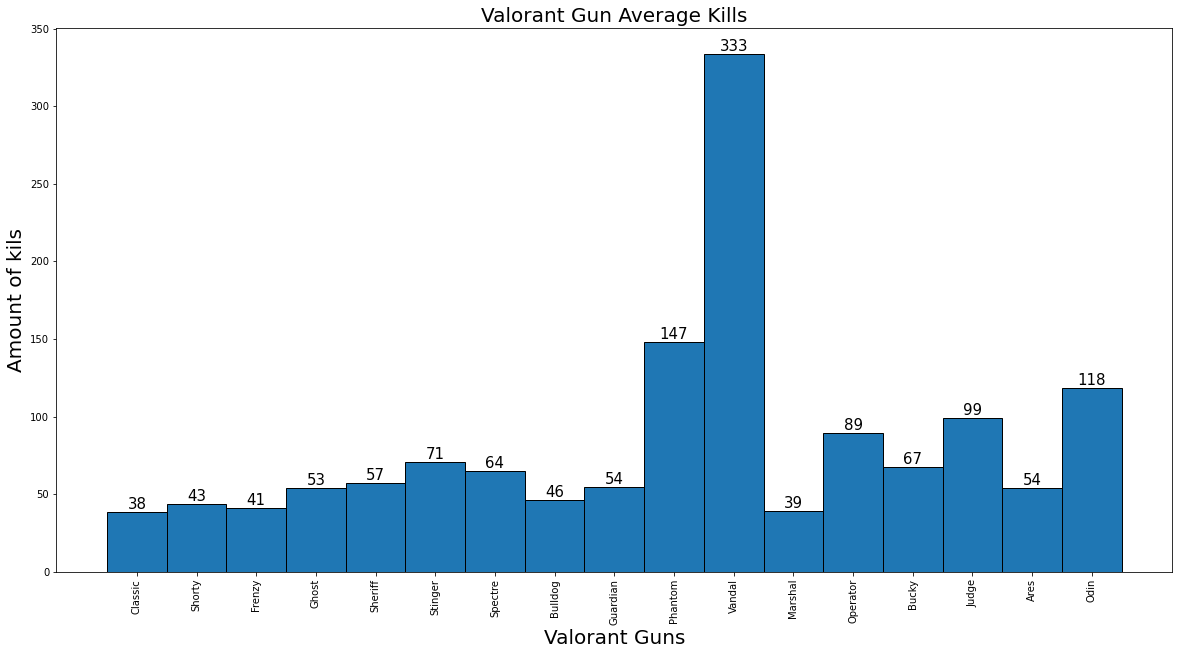

In [21]:
x_data, y_data = everyGunAvgKills()

plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x_data, y_data, label="data", width=1, edgecolor='black')
plt.xticks(rotation=90)
plt.title("Valorant Gun Average Kills", size=20)
plt.xlabel("Valorant Guns", size=20)
plt.ylabel("Amount of kils", size=20)
for i in range(len(x_data)):
    plt.text(i, y_data[i], int(y_data[i]), ha="center", va="bottom", size=15)

plt.show()

>The bar plot above represents the average kills used with each valorant weapon. This allows us to further dig deeper and wonder if users use some weapons because they give them an advantage than others. **For Example**: The Vandal has a whopping 300+ kills on average meanwhile the Phantom which has the same price as the vandal has around 150 kills. Why is that?

---
### Representing Each Gun Price

Using the tidy data we created we will create a function that returns all of the prices of each weapon so that we can eventually visualize it within a matplotlibs

In [22]:
def everyGunCost():
    """
    Returns 2 lists of gunNames and Values
    
    Parameters
    ----------
    None
    
    Returns
    -------
    gunNames : List
        - A list that contains all of 
          the names of the guns
    Values : List
        - A list containing the price of each gun
    """
    Values = []
    gunNames = []
    for i in vlsTidy.iloc[:, 0]:
        gunNames.append(i)
        Values.append(int(gunCost(i)))
    return gunNames, Values


### Representing the Gun Purchase Amount in a plot

Instead of using tabular data we can represent the cost amount into a matplotlibs bar plot. Visualizing this will further help us answer our general question

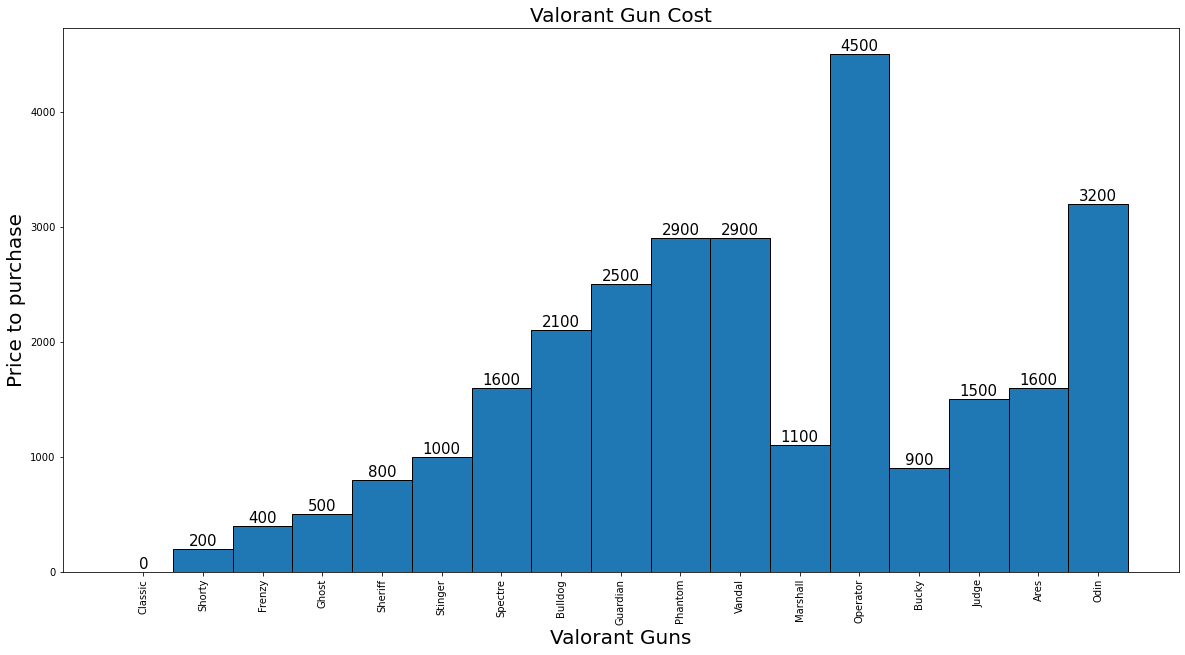

In [23]:
x_data, y_data = everyGunCost()

plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x_data, y_data, label="data", width=1, edgecolor='black')
plt.xticks(rotation=90)
plt.title("Valorant Gun Cost", size=20)
plt.xlabel("Valorant Guns", size=20)
plt.ylabel("Price to purchase", size=20)
for i in range(len(x_data)):
    plt.text(i, y_data[i], y_data[i], ha="center", va="bottom", size=15)
plt.show()

---
## Conclusion

Finally after all of this data we have compiled we can finally answer the big kicking question.

>**Do certain weapons within valorant perhaps give players a higher chance at winning gun fights than other weapons?**

Using most of the functions we have created and visualizing our data. We can confidently come to the conclusion that indeed **some guns do give players more of an edge in winning gun fights** For example if we take a look at two barplots we have above. For instance, why does a weapon that costs 0 which is pretty much **Free** have a **SUPER SIMILAR** kill ratio to the Marhal which costs 1,100 to purchase? Also why does the pistole **Sheriff** have a higher kill count than an LMG such as the Ares. The price difference is 800 creds. 

The only noticeable issue that the game seems to have is the issue of pricing of the respective gun and the average kills of each gun. This can allow us to infer if possibly some guns need to be tuned or changed in price. Although the bodydmg is different for each gun which makes them harder to use we can still tell that players are still winning a lot with these weapons which can relate to the price.

**Respectively all the information does answer my question and makes me think why the company Riot Games doesn't take action in fixing or tuning guns to give a fair advantage**.